In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
def showImg(img, colored=False):
  plt.figure(figsize=(20,20))
  plt.axis("off")
  if (len(img.shape) == 3):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  elif(colored):
    plt.imshow(img)
  else:
    plt.imshow(img, 'gray')

In [39]:
def hw3(img):
    img = img.copy() # prevent mutation
    
    grayed = img.mean(axis=2)
    mask = np.zeros(grayed.shape, np.uint8)

    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

    rect = (0+50, 0+50, grayed.shape[0]-50, grayed.shape[1]-50)
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 7, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    img = img * mask2[:,:,np.newaxis]
    return img

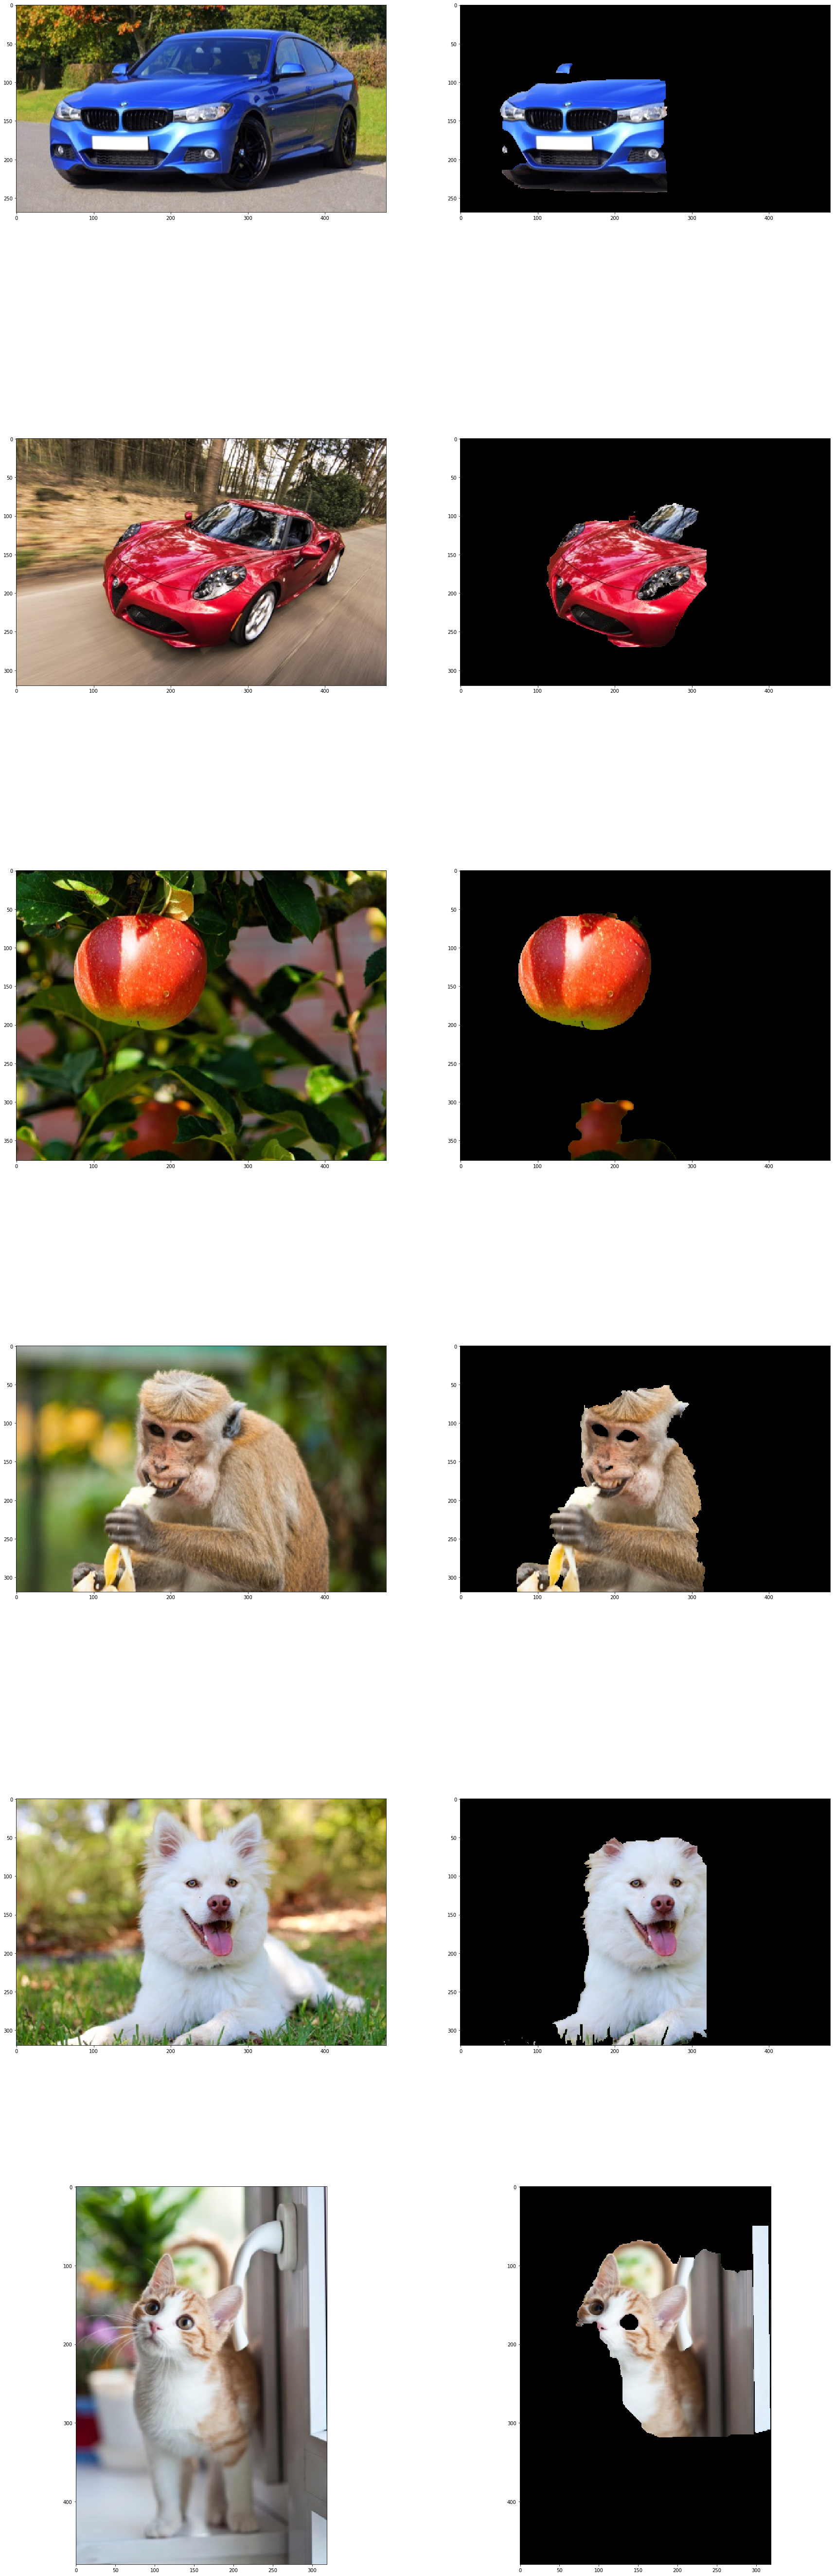

In [40]:
fig, axes = plt.subplots(6,2)
fig.set_size_inches((30,100))

for i in range(6):
  img = cv2.imread(f"images/object/obj{i+1}.jpg")
  axes[i,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  res = hw3(img)
  axes[i,1].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  cv2.imwrite(f"./results/object/res{i}.png",res)
  
plt.show()